In [2]:
import mne
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
p = "/scratch/data/2024FreeViewingMSCOCO/sub-033/ses-001/eeg/sub-033_ses-001_task-2024FreeViewingMSCOCO_eeg.set"
raw = mne.io.read_raw_eeglab(p)

/tmp/ipykernel_1231106/1794257776.py:2: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(p)
/tmp/ipykernel_1231106/1794257776.py:2: RuntimeWarning: Omitted 6 annotation(s) that were outside data range.
  raw = mne.io.read_raw_eeglab(p)


In [102]:
synctrigger = ev.description.str.split("3-",expand=True)[1].str.split("@",expand=True)[1].dropna().values.astype(int)

In [22]:
ev = raw.annotations.to_data_frame()

In [23]:
ev["stimshown"] = ev.description.str.contains("trigger=02")

In [24]:
ev.stimshown.sum()

351

In [76]:
goodix = [v is not None for v in ev.description.str.split("1-",expand=True)[1].values]

In [154]:
ev.iloc[1:1661].stimshown.sum()
ev.iloc[1661:1663]

,onset,duration,description,stimshown
1661,1970-01-01 00:28:27.908463,0.0,3-128@672865,False
1662,1970-01-01 00:33:14.918635,0.0,3-128@2476,False


In [149]:
ev.description.str.split("3-",expand=True)[1].str.split("@",expand=True)[1].dropna().iloc[1573:1574]

1662    2476
Name: 1, dtype: object

In [18]:
%matplotlib qt6

/scratch/users/ehinger/micromamba/envs/2024FreeViewingMSCOCO/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


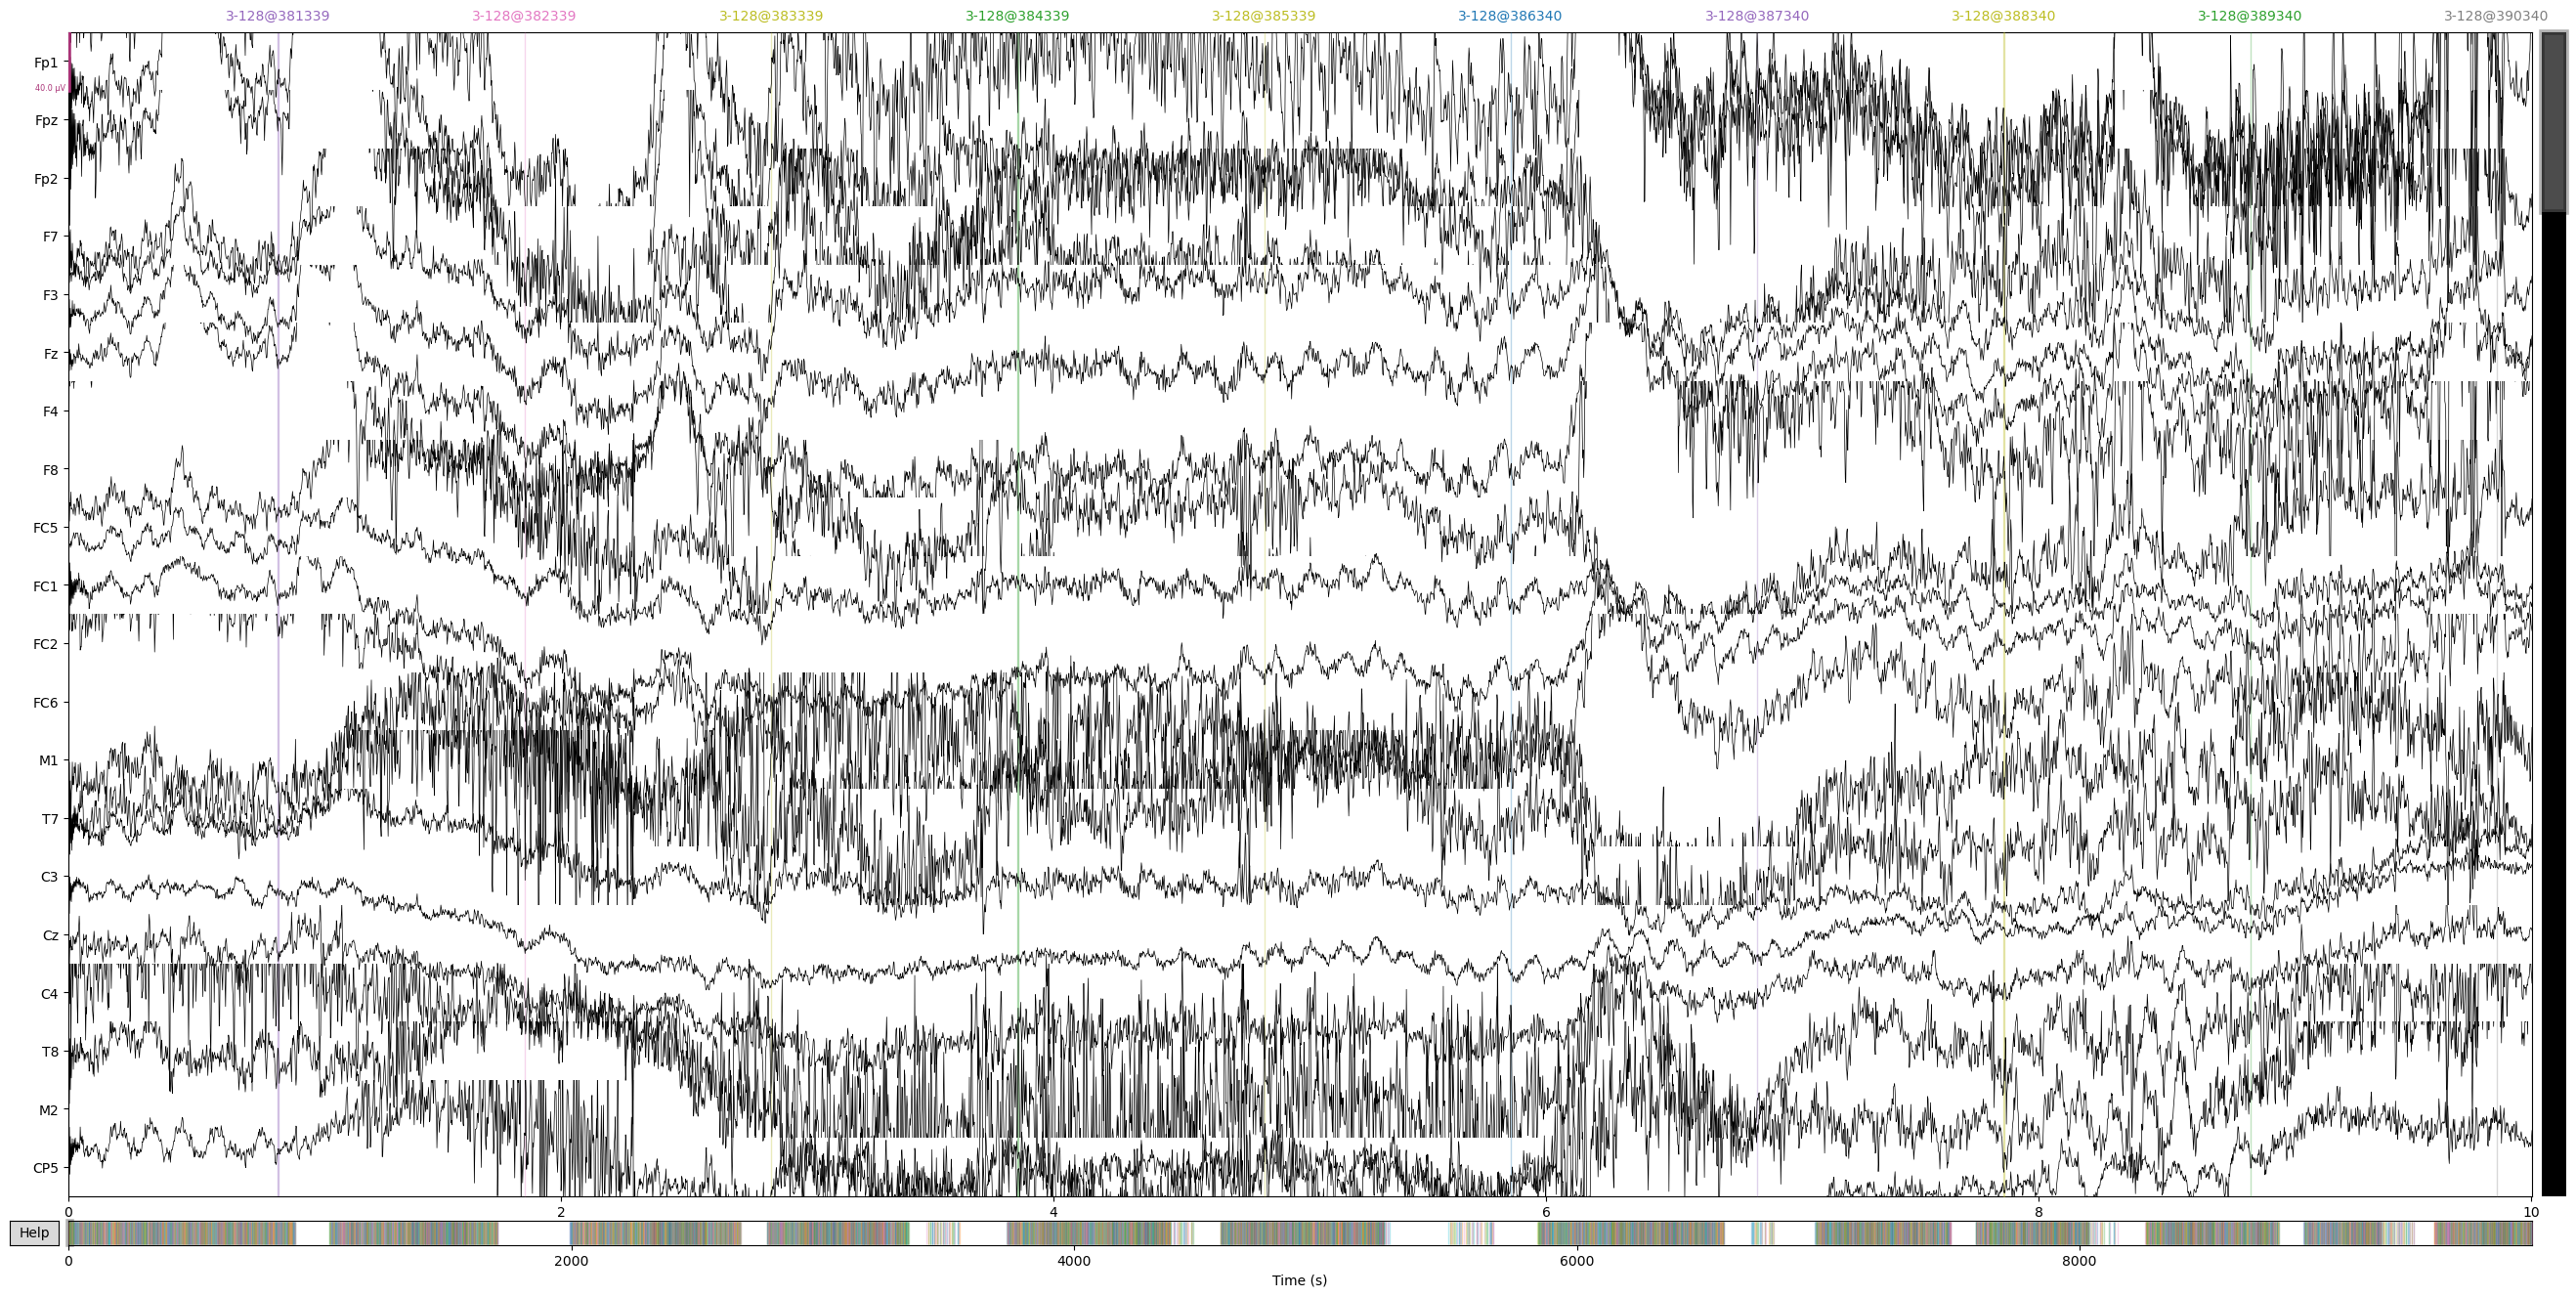

In [20]:
raw.plot()

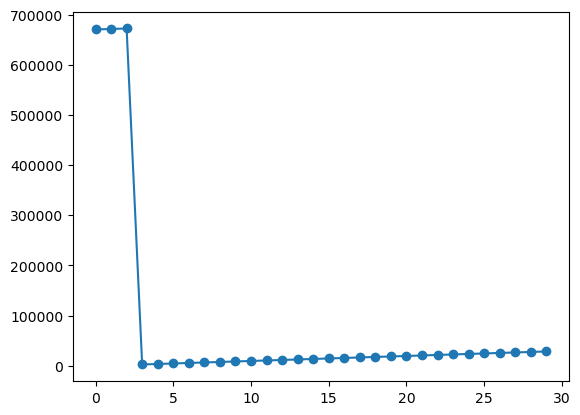

In [147]:
plt.plot(synctrigger[1570:1600],'o-')

In [68]:
all_events, all_event_id = mne.events_from_annotations(raw)
mne.viz.plot_events(events=all_events, event_id=all_event_id, sfreq=raw.info["sfreq"])

Used Annotations descriptions: ['1-trigger=01 Fixation dot shown again due to recalibration | block=2 | trial=67 | image=000000020517_MEG_size.jpg', '1-trigger=01 Fixation dot shown again due to recalibration | block=3 | trial=101 | image=000000576749_MEG_size.jpg', '1-trigger=01 Fixation dot shown again due to recalibration | block=4 | trial=151 | image=000000018367_MEG_size.jpg', '1-trigger=01 Fixation dot shown again due to recalibration | block=4 | trial=154 | image=000000447130_MEG_size.jpg', '1-trigger=01 Fixation dot shown again due to recalibration | block=4 | trial=163 | image=000000525932_MEG_size.jpg', '1-trigger=01 Fixation dot shown again due to recalibration | block=4 | trial=171 | image=000000091005_MEG_size.jpg', '1-trigger=01 Fixation dot shown again due to recalibration | block=4 | trial=197 | image=000000458616_MEG_size.jpg', '1-trigger=01 Fixation dot shown again due to recalibration | block=5 | trial=201 | image=000000043815_MEG_size.jpg', '1-trigger=01 Fixation do

/tmp/ipykernel_4096240/2716852553.py:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events=all_events, event_id=all_event_id, sfreq=raw.info["sfreq"])


ValueError: Image size of 1281x94247 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 1281x94247 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [18]:
d = raw.get_data(units="µV")

In [67]:
raw.annotations.plot()

AttributeError: 'Annotations' object has no attribute 'plot'

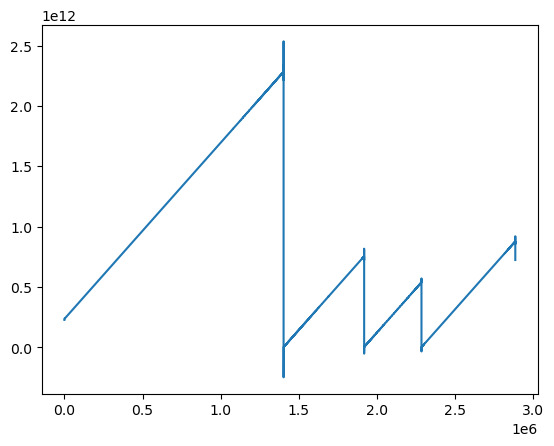

In [56]:
plt.plot(d[-1,:])
#plt.xlim((1.4025e6 ,1.4026e6))
plt.show()

In [64]:
raw.annotations.to_data_frame().description.str.contains("image").sum()

829

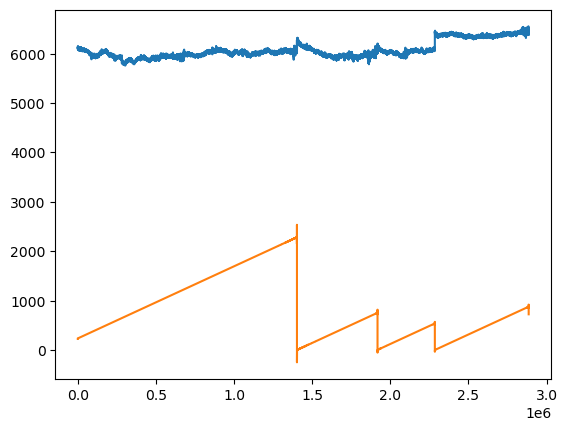

In [55]:
import matplotlib.pyplot as plt
plt.plot(d[10,:])
plt.plot(d[-1,:]/1e9)
#plt.xlim((2.2848e6,2.2850e6))
plt.show()

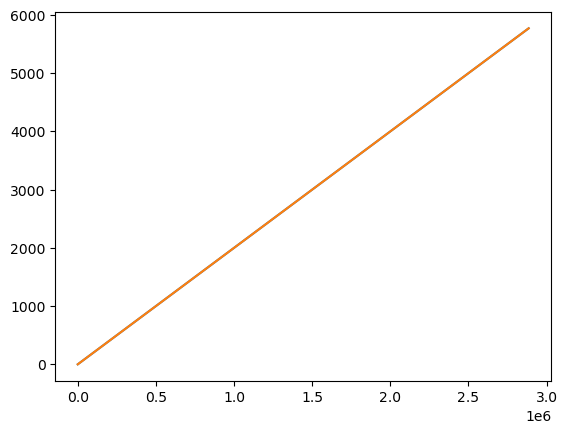

In [32]:
plt.plot(raw.times)
plt.show()